# Info aidTech -Task1- Iris Flower Classification 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.preprocessing as sp
from sklearn.metrics import accuracy_score

# Load the dataset

In [4]:
data=pd.read_csv('IRIS (1).csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.shape

(150, 5)

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
corr=data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

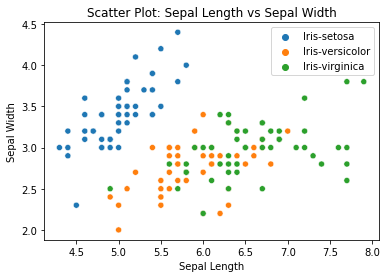

In [18]:
# Scatter plot between sepal length and sepal width with different colors for different species
plt.figure()
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.legend()
plt.show()

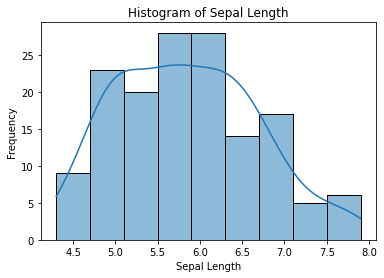

In [15]:
#  histogram for 'sepal_length'
plt.figure()
sns.histplot(data['sepal_length'], kde=True)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

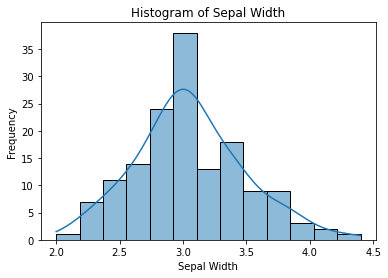

In [16]:
# histogram for 'sepal_length'
plt.figure()
sns.histplot(data['sepal_width'], kde=True)
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.show()

In [20]:
# Feature Scaling
X=np.c_[data.iloc[:,0:4]]
Y=data.iloc[:,4]
encoder=sp.LabelEncoder()
Y_1=encoder.fit_transform(Y).reshape(-1,1)
Y_1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# Data Preprocessing : split dataset into train,test

In [21]:
train_x,test_x,train_y,test_y=train_test_split(X,Y_1)

# Training using KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)
pred_y=model.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model, train_x, train_y)
conf_mx = confusion_matrix(train_y, y_train_pred)
conf_mx

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([[34,  0,  0],
       [ 0, 37,  1],
       [ 0,  1, 39]], dtype=int64)

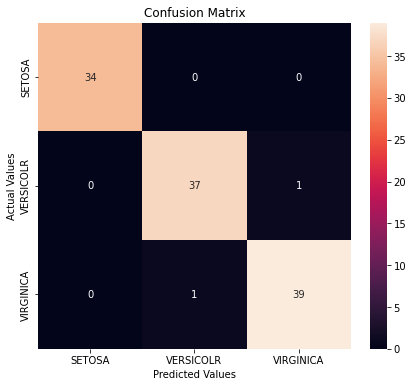

In [24]:
import seaborn as sns
conf_mx=pd.DataFrame(conf_mx,index=['SETOSA','VERSICOLR','VIRGINICA'],columns=['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,6))
sns.heatmap(conf_mx,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
report=classification_report(test_y,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.83      0.87        12
           2       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



In [31]:
# n=5
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5)
model.fit(train_x,train_y)
pred_y=model.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model, train_x, train_y)
conf_mx = confusion_matrix(train_y, y_train_pred)
conf_mx

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([[34,  0,  0],
       [ 0, 37,  1],
       [ 0,  0, 40]], dtype=int64)

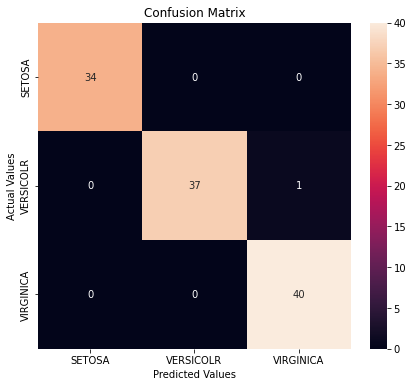

In [33]:
import seaborn as sns
conf_mx=pd.DataFrame(conf_mx,index=['SETOSA','VERSICOLR','VIRGINICA'],columns=['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,6))
sns.heatmap(conf_mx,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [34]:
report=classification_report(test_y,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        12
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



# Training using Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(train_x,train_y)
pred_y=model.predict(test_x)

In [27]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model, train_x, train_y)
conf_mx = confusion_matrix(train_y, y_train_pred)
conf_mx

array([[34,  0,  0],
       [ 0, 36,  2],
       [ 0,  2, 38]], dtype=int64)

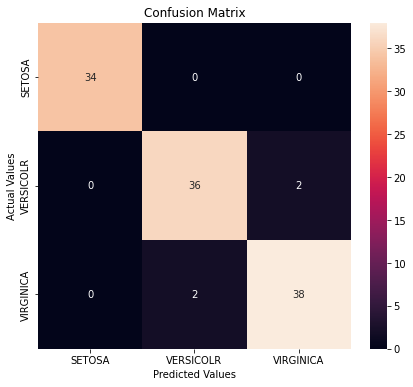

In [28]:
import seaborn as sns
conf_mx=pd.DataFrame(conf_mx,index=['SETOSA','VERSICOLR','VIRGINICA'],columns=['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,6))
sns.heatmap(conf_mx,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [29]:
report=classification_report(test_y,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        12
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [37]:
import pandas as pd

results = pd.DataFrame({
    'Model': [ 'KNN for n=3','KNN for n=5', 'Decision Tree Classifier'],
    'Score': [0.92,0.95, 0.95]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.95,KNN for n=5
0.95,Decision Tree Classifier
0.92,KNN for n=3
